<a href="https://colab.research.google.com/github/Shashwat26Bhatnagar/Myprofile/blob/main/derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[12,12]
plt.rcParams.update({'font.size':18})

n=64
L=30
dx=L/n
x=np.arange(-L/2,L/2,dx,dtype="complex_")
f=np.cos(x)*np.exp(-np.power(x,2)/25)#function
df=-(np.sin(x)*np.exp(-np.power(x,2)/25)+(2/25)*x*f)#derivative

In [15]:
##finite difference 
%%timeit
dfFD=np.zeros(len(df),dtype="complex_")
for kappa in range(len(df)-1):
  dfFD[kappa]=(f[kappa+1]-f[kappa])/dx
dfFD[-1]=dfFD[-2]


69.2 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
#FFT OR spectral derivative
%%timeit
fhat=np.fft.fft(f)
#omega is temporal frequency(2pie/T) while kappa is spacial freq(2pie/Lambda)
kappa=(2*np.pi/L)*np.arange(-n/2,n/2)
kappa=np.fft.fftshift(kappa)#reordre fft fre
fourier_transform_of_df=kappa*fhat*(1j)
df_using_FFT=np.real(np.fft.ifft(fourier_transform_of_df))


36.2 µs ± 6.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


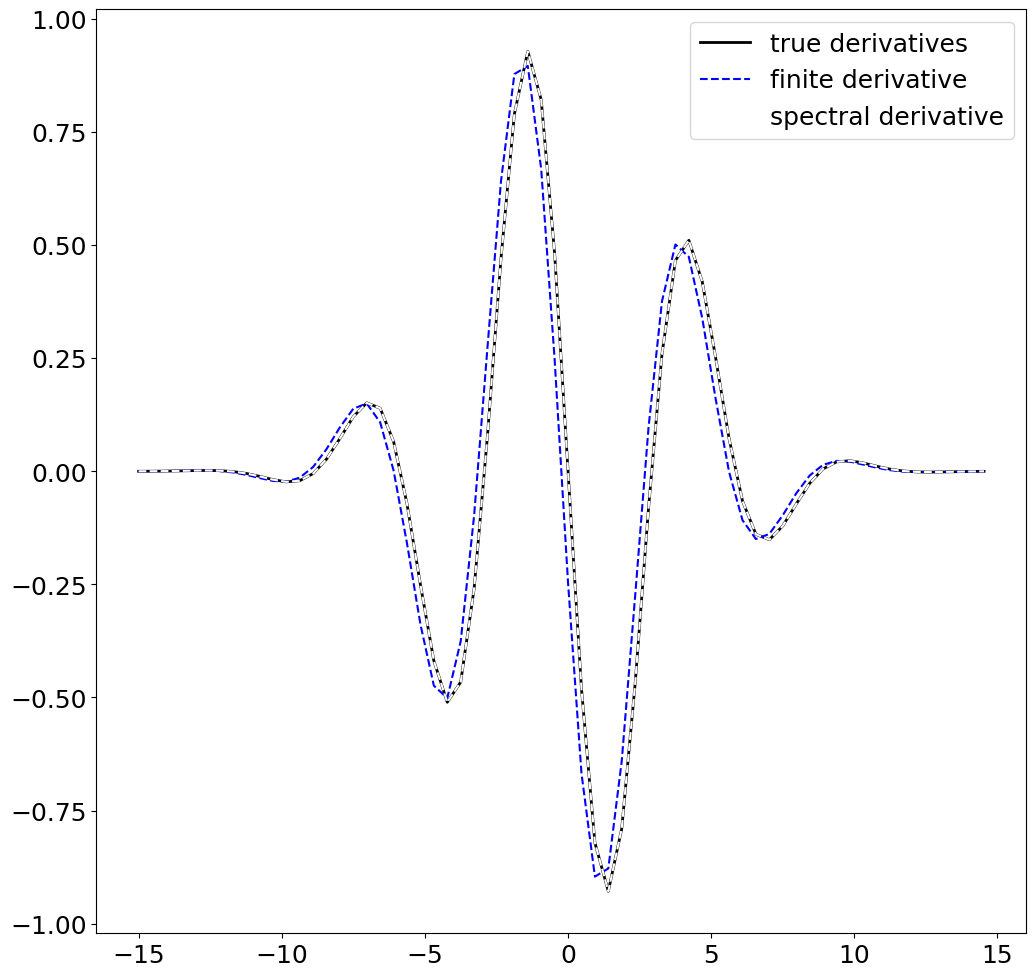

In [10]:
plt.plot(x,df.real,color="k",linewidth=2,label="true derivatives")
plt.plot(x,dfFD.real,'--',color='b',linewidth=1.5,label="finite derivative")
plt.plot(x,df_using_FFT,'--',color='w',linewidth=1.5,label="spectral derivative")
plt.legend()
plt.show()
